In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import prepare
import acquire2
import acquire

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
df = acquire2.get_telco_data(use_cache = True)
df.head().T

Using cached csv


,0,1,2,3,4
payment_type_id,2,2,1,1,2
contract_type_id,2,1,1,1,1
internet_service_type_id,1,1,2,2,2
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes


In [3]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [4]:
telco_df = prepare.prep_telco_data(df)

In [94]:
train, test, validate = telco_df

## Data Pre-Processing

In [19]:
#subset categorical columns, senior_citizen is missing, so append to the list

categorical_columns = [column for column in df.columns if df[column].dtype == 'O'] 

#subset categorical columns, senior_citizen is missing, so append to the list
#categorical_columns.append('senior_citizen')

categorical_columns = ['gender', 
                       'senior_citizen', 
                       'partner', 
                       'dependents', 
                       'phone_service', 
                       'multiple_lines', 
                       'online_security', 
                       'online_backup', 
                       'device_protection', 
                       'tech_support', 
                       'streaming_tv', 
                       'streaming_movies', 
                       'paperless_billing', 
                       'total_charges', 
                       'churn', 
                       'internet_service_type', 
                       'contract_type', 
                       'payment_type']


categorical_columns
#missing senior_citizen, idk why, make a list and extend

#cat_cols2 = train['senior_citizen']
#categorical_columns.extend(cat_cols2)


['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'total_charges',
 'churn',
 'internet_service_type',
 'contract_type',
 'payment_type']

In [20]:
train.describe()

,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,senior_citizen_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,...,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,32.775210,64.805131,2316.775641,0.498095,0.485141,0.302769,0.905258,0.590297,0.265685,0.161290,...,0.386335,0.220218,0.391415,0.207010,0.243078,0.437389,0.220218,0.227330,0.327407,0.226314
std,24.709604,30.294804,2284.984394,0.500060,0.499843,0.459514,0.292896,0.491841,0.441753,0.367845,...,0.486971,0.414447,0.488129,0.405215,0.428997,0.496127,0.414447,0.419161,0.469327,0.418498
min,1.000000,18.250000,18.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,34.700000,396.100000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,70.250000,1414.800000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,90.300000,3893.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,72.000000,118.650000,8594.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
train.churn.value_counts()

No     2891
Yes    1046
Name: churn, dtype: int64

In [ ]:
train.columns.to_list()

In [ ]:
train.churn_encoded.value_counts()

In [36]:
2891 / (2891 + 1046)

0.7343154686309372

In [ ]:
train.head().T

# Train, Test, Split

In [10]:
#split into train, test, and validate to the telco_df
# train, test, validate = telco_df

In [71]:
#remove target variable before fit

categorical_columns.append('churn')
categorical_columns.append('churn_encoded')


X_train = train.drop(columns = categorical_columns)
y_train = train.churn_encoded

X_validate = validate.drop(columns = categorical_columns)
y_validate = validate.churn_encoded

X_test = test.drop(columns = categorical_columns)
y_test = test.churn_encoded

X_test.head()

,tenure,monthly_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,senior_citizen_encoded,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
816,27,95.00,1,1,0,1,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0
1488,71,89.30,1,1,0,1,0,0,0,1,...,1,0,1,0,1,0,0,1,0,0
4796,44,54.00,0,0,0,0,1,0,1,0,...,1,0,1,1,0,0,0,0,1,0
3213,27,19.90,1,1,1,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
5026,62,20.05,0,1,1,1,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0



X_train = train.drop(columns = ['churn_encoded'])
y_train = train.churn_encoded

X_validate = validate.drop(columns = ['churn_encoded'])
y_validate = validate.churn_encoded

X_test = test.drop(columns = ['churn_encoded'])
y_test = test.churn_encoded

## Establish Baseline

In [26]:
# since most customers in this dataset did not churn, use mode as baseline

baseline = y_train.mode()

#boolean array
baseline_prediction = y_train == 0

baseline_accuracy = round(baseline_prediction.mean(),2)
print(f'Baseline Accuracy: {baseline_accuracy}') 

Baseline Accuracy: 0.73


## Make the Object - Decision Tree

In [50]:
clf = DecisionTreeClassifier(max_depth = 3, random_state = 123)

## Fit the Model

In [51]:
# model.fit(X , y)
clf = clf.fit(X_train, y_train)
X_train.head()

,tenure,monthly_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,senior_citizen_encoded,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,58,71.10,1,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1915,71,85.45,0,0,1,1,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
5054,35,25.75,1,1,1,1,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
2355,1,19.20,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
6279,20,54.00,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


### Visualize the Object

[Text(446.4, 380.52, 'tenure <= 15.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(223.2, 271.8, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.498\nsamples = 1371\nvalue = [733, 638]\nclass = 0'),
 Text(111.6, 163.07999999999998, 'tenure <= 3.5\ngini = 0.416\nsamples = 804\nvalue = [567, 237]\nclass = 0'),
 Text(55.8, 54.360000000000014, 'gini = 0.491\nsamples = 356\nvalue = [202, 154]\nclass = 0'),
 Text(167.39999999999998, 54.360000000000014, 'gini = 0.302\nsamples = 448\nvalue = [365, 83]\nclass = 0'),
 Text(334.79999999999995, 163.07999999999998, 'tenure <= 1.5\ngini = 0.414\nsamples = 567\nvalue = [166, 401]\nclass = 1'),
 Text(279.0, 54.360000000000014, 'gini = 0.206\nsamples = 129\nvalue = [15, 114]\nclass = 1'),
 Text(390.59999999999997, 54.360000000000014, 'gini = 0.452\nsamples = 438\nvalue = [151, 287]\nclass = 1'),
 Text(669.5999999999999, 271.8, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.267\nsamples = 2566\nvalue = [2158, 408]\nclas

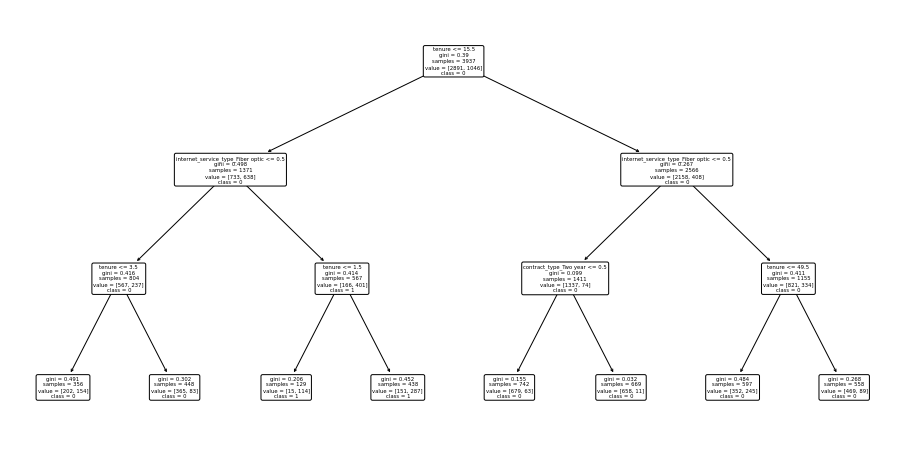

In [52]:
plt.figure(figsize = (16, 8))
plot_tree(clf, feature_names = X_train.columns, class_names = clf.classes_.astype(str), rounded = True)

### Make Predictions

In [53]:
y_predictions = clf.predict(X_train)

### Estimate Probability

In [54]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.91509434, 0.08490566],
       [0.84050179, 0.15949821],
       [0.91509434, 0.08490566],
       [0.56741573, 0.43258427],
       [0.91509434, 0.08490566]])

### Evaluate Model

In [55]:
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))

Accuracy of Decision Tree Classifier on training set: 0.79


#### Create a confusion matrix

   - True Positive: number of occurrences where y is true and y is predicted true.
   -  True Negative: number of occurrences where y is false and y is predicted false.
   - False Positive: number of occurrences where y is false and y is predicted true.
   - False Negative: number of occurrences where y is true and y is predicted false.

In [62]:
labels = ['Actually Retained', 'Actually Churned']
col_labels = ['Pred. Retained', 'Pred. Churned']

pd.DataFrame(confusion_matrix(y_train, y_predictions), index = labels, columns = col_labels)

,Pred. Retained,Pred. Churned
Actually Retained,2725,166
Actually Churned,645,401


### Metrics (Manual)

In [66]:
#must put it as y_train, y_predictions to follow confusion matrix
#TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

#will re-sort when re-run, so add labels in order (because did not churn (0) 
# is my positive case in binary, it goes first)
TP, FN, FP, TN = confusion_matrix(y_train, y_predictions, labels = [0 , 1]).ravel()
ALL = TP + TN + FP + FN

TP, FN, FP, TN 

(2725, 166, 645, 401)

In [67]:
accuracy = (TP + TN)/ ALL
print(f'Accuracy: {accuracy}')

true_positive_rate = TP / (TP + FN)
print(f'True Positive Rate: {true_positive_rate}')

false_positive_rate = FP / (FP + TN)
print(f'False Positive Rate: {false_positive_rate}')

precision = TP / (TP + FP)
print(f'Precision: {precision}')

recall = TP / (TP + FN)
print(f'Recall: {recall}')

f1_score = 2 * (precision * recall) / (precision + recall)
print(f'F1 Score: {f1_score}')

support_pos = TP + FN
print(f'Support (0): {support_pos}')

support_neg = FP + TN
print(f'Support (1): {support_neg}')

Accuracy: 0.794005588011176
True Positive Rate: 0.9425804219993082
False Positive Rate: 0.6166347992351816
Precision: 0.8086053412462908
Recall: 0.9425804219993082
F1 Score: 0.8704679763616036
Support (0): 2891
Support (1): 1046


### Metrics (Classification Report)

In [69]:
c_report = classification_report(y_train, y_predictions, output_dict = True)
pd.DataFrame(c_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.808605,0.707231,0.794006,0.757918,0.781672
recall,0.942580,0.383365,0.794006,0.662973,0.794006
f1-score,0.870468,0.497210,0.794006,0.683839,0.771299
support,2891.000000,1046.000000,0.794006,3937.000000,3937.000000


## max_depth 10

In [84]:
clf = DecisionTreeClassifier(max_depth = 10, random_state = 123)

# model.fit(X , y)

clf = clf.fit(X_train, y_train)

#make predictions
y_predictions = clf.predict(X_train)

#estimate probability
y_pred_proba = clf.predict_proba(X_train)

#accuracy (Model Score) on training set
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))

Accuracy of Decision Tree Classifier on training set: 0.88


In [86]:
#confusion matrix
labels = ['Actually Retained', 'Actually Churned']
col_labels = ['Pred. Retained', 'Pred. Churned']

pd.DataFrame(confusion_matrix(y_train, y_predictions), index = labels, columns = col_labels)

,Pred. Retained,Pred. Churned
Actually Retained,2706,185
Actually Churned,273,773


In [87]:
#must put it as y_train, y_predictions to follow confusion matrix
#TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

#will re-sort when re-run, so add labels in order (because did not churn (0) 
# is my positive case in binary, it goes first)
TP, FN, FP, TN = confusion_matrix(y_train, y_predictions, labels = [0 , 1]).ravel()
ALL = TP + TN + FP + FN

TP, FN, FP, TN 

(2706, 185, 273, 773)

In [89]:
accuracy = (TP + TN)/ ALL
print(f'Accuracy: {accuracy}')

true_positive_rate = TP / (TP + FN)
print(f'True Positive Rate: {true_positive_rate}')

false_positive_rate = FP / (FP + TN)
print(f'False Positive Rate: {false_positive_rate}')

precision = TP / (TP + FP)
print(f'Precision: {precision}')

recall = TP / (TP + FN)
print(f'Recall: {recall}')

f1_score = 2 * (precision * recall) / (precision + recall)
print(f'F1 Score: {f1_score}')

support_pos = TP + FN
print(f'Support (0): {support_pos}')

support_neg = FP + TN
print(f'Support (1): {support_neg}')

Accuracy: 0.8836677673355346
True Positive Rate: 0.936008301625735
False Positive Rate: 0.2609942638623327
Precision: 0.9083585095669687
Recall: 0.936008301625735
F1 Score: 0.9219761499148211
Support (0): 2891
Support (1): 1046


In [88]:
#classification report
c_report = classification_report(y_train, y_predictions, output_dict = True)
pd.DataFrame(c_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.908359,0.806889,0.883668,0.857624,0.881400
recall,0.936008,0.739006,0.883668,0.837507,0.883668
f1-score,0.921976,0.771457,0.883668,0.846717,0.881986
support,2891.000000,1046.000000,0.883668,3937.000000,3937.000000


## max_depth 18

In [90]:
clf = DecisionTreeClassifier(max_depth = 18, random_state = 123)

# model.fit(X , y)

clf = clf.fit(X_train, y_train)

#make predictions
y_predictions = clf.predict(X_train)

#estimate probability
y_pred_proba = clf.predict_proba(X_train)

#accuracy (Model Score) on training set
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))

Accuracy of Decision Tree Classifier on training set: 0.99


In [91]:
#confusion matrix
labels = ['Actually Retained', 'Actually Churned']
col_labels = ['Pred. Retained', 'Pred. Churned']

pd.DataFrame(confusion_matrix(y_train, y_predictions), index = labels, columns = col_labels)

,Pred. Retained,Pred. Churned
Actually Retained,2877,14
Actually Churned,13,1033


In [92]:
#must put it as y_train, y_predictions to follow confusion matrix
#TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

#will re-sort when re-run, so add labels in order (because did not churn (0) 
# is my positive case in binary, it goes first)
TP, FN, FP, TN = confusion_matrix(y_train, y_predictions, labels = [0 , 1]).ravel()
ALL = TP + TN + FP + FN

TP, FN, FP, TN 

(2877, 14, 13, 1033)

In [93]:
accuracy = (TP + TN)/ ALL
print(f'Accuracy: {accuracy}')

true_positive_rate = TP / (TP + FN)
print(f'True Positive Rate: {true_positive_rate}')

false_positive_rate = FP / (FP + TN)
print(f'False Positive Rate: {false_positive_rate}')

precision = TP / (TP + FP)
print(f'Precision: {precision}')

recall = TP / (TP + FN)
print(f'Recall: {recall}')

f1_score = 2 * (precision * recall) / (precision + recall)
print(f'F1 Score: {f1_score}')

support_pos = TP + FN
print(f'Support (0): {support_pos}')

support_neg = FP + TN
print(f'Support (1): {support_neg}')

Accuracy: 0.9931419862839725
True Positive Rate: 0.9951573849878934
False Positive Rate: 0.0124282982791587
Precision: 0.9955017301038063
Recall: 0.9951573849878934
F1 Score: 0.9953295277633627
Support (0): 2891
Support (1): 1046


### Evaluate on Validate

In [72]:
print('Accuracy of Decision Tree Classifier on validate set: {:.2f}'.format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree Classifier on validate set: 0.80


In [74]:
#Produce y_predictions that come from the X_validate

y_predictions = clf.predict(X_validate)

#compare actual y values (from validate) to predicted y_values from the model run on X_validate

c_report = classification_report(y_validate, y_predictions, output_dict = True)
pd.DataFrame(c_report)


,0,1,accuracy,macro avg,weighted avg
precision,0.812919,0.702326,0.79602,0.757623,0.783522
recall,0.938045,0.403743,0.79602,0.670894,0.796020
f1-score,0.871011,0.512733,0.79602,0.691872,0.775776
support,1033.000000,374.000000,0.79602,1407.000000,1407.000000


### Which model performs better on your in-sample (train) data?

- Model w/ max_depth = 20

## Loop to Determine Best max_depth (on train data)

In [82]:
for i in range (1, 21):
    #make the model
    tree = DecisionTreeClassifier(max_depth = i, random_state = 123)
    
    #fit the model
    tree = tree.fit(X_train, y_train)
    
    #use the model
    #evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)
    
    #produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict = True)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(report))
    

Tree with max depth of 1
                     0       1  accuracy    macro avg  weighted avg
precision     0.734315     0.0  0.734315     0.367158      0.539219
recall        1.000000     0.0  0.734315     0.500000      0.734315
f1-score      0.846807     0.0  0.734315     0.423404      0.621824
support    2891.000000  1046.0  0.734315  3937.000000   3937.000000
Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.808605     0.707231  0.794006     0.757918      0.781672
recall        0.942580     0.383365  0.794006     0.662973      0.794006
f1-score      0.870468     0.497210  0.794006     0.683839      0.771299
support    2891.000000  1046.000000  0.794006  3937.000000   3937.000000
Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.808605     0.707231  0.794006     0.757918      0.781672
recall        0.942580     0.383365  0.794006     0.662973      0.794006
f

### Which model performs best on your out-of-sample data, the validate set?

- Model w/ max_depth = 8

## Validation Loop (Out of Sample Accuracy)

In [78]:
metrics = []

for i in range (2, 25):
    #make the model
    tree = DecisionTreeClassifier(max_depth = i, random_state = 123)
    
    #fit the  model (on train and only train)
    tree = tree.fit(X_train, y_train)
    
    #use the model
    #examine the models performance on train first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)
    
    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)

df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.794006,0.796020,-0.002014
1,3,0.794006,0.796020,-0.002014
2,4,0.800102,0.799574,0.000528
3,5,0.806706,0.798863,0.007843
4,6,0.815596,0.796731,0.018865
5,7,0.829820,0.770434,0.059386
6,8,0.843790,0.776119,0.067670
7,9,0.865634,0.759773,0.105861
8,10,0.883668,0.747690,0.135978
9,11,0.905766,0.753376,0.152390
